In [1]:
# Analysis of correlation between -logKd(Ki) and MW, statistics from PDBbind v2003.
import pandas as pd
input_file = pd.read_csv('merge_pka_MW.csv', sep = ' ', header=None, names=["PDB code", "resolution", "release year", "logKd", "reference", "-", "MW"])
input_file.head()

,PDB code,resolution,release year,logKd,reference,-,MW
0,1zsb,2.0,1996,0.60,-----,1zsb.pdf,222.245
1,1f9g,2.0,2001,1.28,-----,1f9g.pdf,176.124
2,1b74,2.3,2000,1.30,-----,1b74.pdf,147.152
3,1qpb,2.4,2000,1.36,-----,1qpb.pdf,87.077
4,1tnk,1.8,1994,1.49,-----,1tnh.pdf,136.214


0.3608533917515964 4.577154860091956e-29


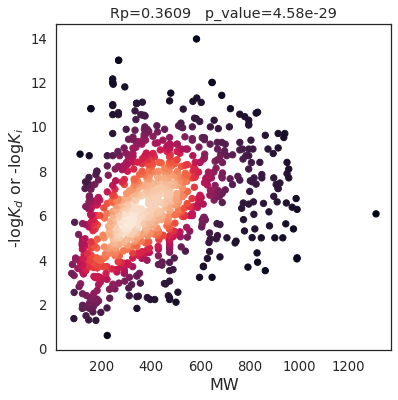

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr, pearsonr
plt.figure(figsize=(6, 6), facecolor='w', edgecolor='k')
# plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)
sns.set_style("white")

x=input_file.MW
y=input_file.logKd
xy = np.vstack([x,y])
z = stats.gaussian_kde(xy)(xy)
Rp, p_value=pearsonr(x,y)
plt.scatter(x, y, c=z, s=40)

plt.xlabel("MW", size=16)
# plt.ylabel("-log${K_d}$${(K_i)}$", size=16)
plt.ylabel("-log${K_d}$ or -log${K_i}$", size=16)
plt.title("Rp={:.4f}   p_value={:.3}".format(Rp, p_value))
plt.savefig("/home/mxu02/test/PDBbind_MW.png", dpi=300)
print(Rp,p_value)